# Abalone's age prediction using Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures

Using 'abalone.csv' file :-

In [2]:
df = pd.read_csv('abalone.csv')
df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Splitting the data into test and train

In [25]:
[X_train, X_test] =train_test_split(df, test_size=0.30, random_state=42, shuffle = True)

Saving the training and testing data in CSV files

In [4]:
X_train.to_csv("abalone-train.csv",index = False)
X_test.to_csv("abalone-test.csv",index = False)

Finding the attribute which has the highest Pearson correlation coefficient with the target attribute 
Rings

In [7]:
corr = df.corr(method = 'pearson')
print(corr['Rings'])

Length            0.556720
Diameter          0.574660
Height            0.557467
Whole weight      0.540390
Shucked weight    0.420884
Viscera weight    0.503819
Shell weight      0.627574
Rings             1.000000
Name: Rings, dtype: float64


# Linear Regression

Function for simple linear (straight-line) regression model to predict 
rings

In [8]:
def linear_fit(data):
    regressor = LinearRegression()
    shell_weight = np.array(data['Shell weight'])
    shell_weight = shell_weight.reshape(-1,1)
    Rings = np.array(data['Rings'])
    Rings = Rings.reshape(-1,1)
    regressor.fit(shell_weight, Rings)
    y_pred = regressor.predict(shell_weight)
    return y_pred

Best fit line between 'Shell weight' and 'Rings'

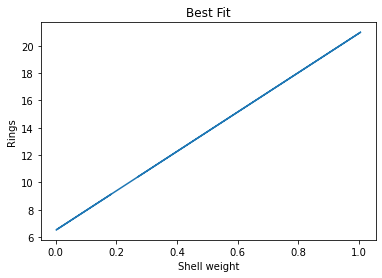

In [9]:
plt.title("Best Fit")
plt.xlabel("Shell weight")
plt.ylabel("Rings")
plt.plot(X_train['Shell weight'], linear_fit(X_train))
plt.show()

 The prediction accuracy on the training and data using root mean squared error

In [11]:
error_train = sqrt(mean_squared_error(X_train['Rings'], linear_fit(X_train))) #computing the error in train data
error_test = sqrt(mean_squared_error(X_test['Rings'],linear_fit(X_test)))#computing the error in test data
print("RMSE Error for Linear Regression, Train data is : %.2f"%(error_train))
print("RMSE Error for Linear Regression, Test data is : %.2f"%(error_test))

RMSE Error for Linear Regression, Train data is : 2.53
RMSE Error for Linear Regression, Test data is : 2.47


 The scatter plot of actual Rings (x-axis) vs predicted Rings (y-axis) on the test data :-

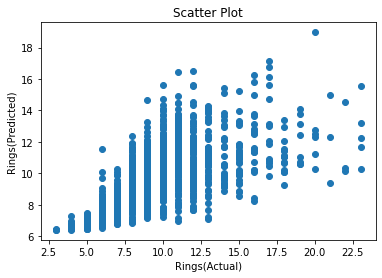

In [12]:
plt.title("Scatter Plot") 
plt.xlabel("Rings(Actual)")
plt.ylabel("Rings(Predicted)")
plt.scatter(X_test['Rings'], linear_fit(X_test))
plt.show()

# Multivariate Linear Regression Model

Function for Multivariate linear regression model to predict rings

In [13]:
def multiple_fit(data):
    regressor = LinearRegression()
    input_var = np.array(data.iloc[:,:-1])
    target = np.array(data.iloc[:,-1])
    regressor.fit(input_var,target)
    pred = regressor.predict(input_var)
    return pred

The prediction accuracy on the training and data using root mean squared error :-

In [15]:
multiple_error_train = sqrt(mean_squared_error(X_train['Rings'], multiple_fit(X_train))) #computing the error in train data
multiple_error_test = sqrt(mean_squared_error(X_test['Rings'],multiple_fit(X_test)))#computing the error in test data
print("RMSE Error for Multiple Regression, Train data is : %.2f"%(multiple_error_train))
print("RMSE Error for Multiple Regression, Test data is : %.2f"%(multiple_error_test))

RMSE Error for Multiple Regression, Train data is : 2.22
RMSE Error for Multiple Regression, Test data is : 2.21


The scatter plot of actual Rings (x-axis) vs predicted Rings (y-axis) on the test data :-

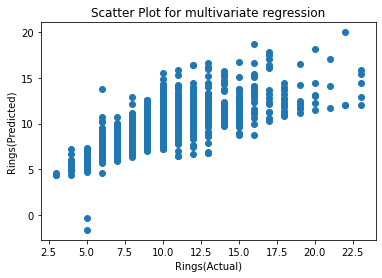

In [17]:
plt.title("Scatter Plot for multivariate regression")
plt.xlabel("Rings(Actual)")
plt.ylabel("Rings(Predicted)")
plt.scatter(X_test['Rings'], multiple_fit(X_test))
plt.show()

# Simple Nonlinear Regression Model

Simple nonlinear regression model using polynomial curve fitting 
to predict Rings :-

In [18]:
def poly_pred(data):#Function for prediction of data
    l = []
    for i in [2,3,4,5]:
        polynomial_features = PolynomialFeatures(degree = i)
        shell_weight = np.array(data['Shell weight'])
        shell_weight = shell_weight.reshape(-1,1)
        Rings = np.array(data['Rings'])
        Rings = Rings.reshape(-1,1)
        x_poly = polynomial_features.fit_transform(shell_weight)
        regressor = LinearRegression()
        regressor.fit(x_poly, Rings)
        y_pred = regressor.predict(x_poly)
        error = sqrt(mean_squared_error(data['Rings'], y_pred))
        l.append(error)
    ls = [round(x,3) for x in l]
    return [ls,y_pred]

Prediction accuracy on the training and test data for the different values of degree of 
the polynomial (p = 2, 3, 4, 5) using root mean squared error (RMSE)

In [20]:
p = [2,3,4,5]
print("\nRMSE for Training data :-")
for i in range(len(p)):
    print("RMSE Error for p = %d is %.2f"%(p[i],poly_pred(X_train)[0][i]))
print("\nRMSE for Test data :-")
for i in range(len(p)):
    print("RMSE Error for p = %d is %.2f"%(p[i],poly_pred(X_test)[0][i]))


RMSE for Training data :-
RMSE Error for p = 2 is 2.50
RMSE Error for p = 3 is 2.48
RMSE Error for p = 4 is 2.47
RMSE Error for p = 5 is 2.47

RMSE for Test data :-
RMSE Error for p = 2 is 2.43
RMSE Error for p = 3 is 2.41
RMSE Error for p = 4 is 2.41
RMSE Error for p = 5 is 2.41


Plotting the RMSE vs degree of polynomial graph :-

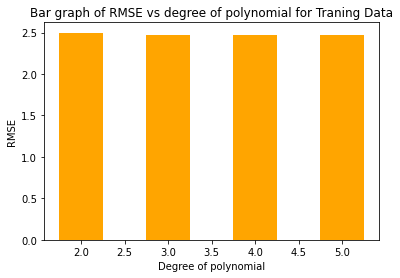

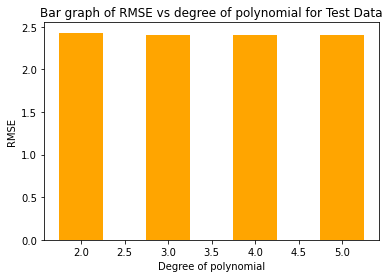

In [22]:
def plot2(data,x,y): #function for plotting RMSE vs degree of polynomial
    plt.title('Bar graph of RMSE vs degree of polynomial for %s'%(data))
    plt.xlabel('Degree of polynomial')
    plt.ylabel('RMSE')
    plt.bar(x, y, color = 'orange', width = .50)
    plt.show()
    
plot2('Traning Data',[2,3,4,5],poly_pred(X_train)[0])
plot2('Test Data',[2,3,4,5],poly_pred(X_test)[0])

Plotting the best fit curve using the best fit model on the training data :-

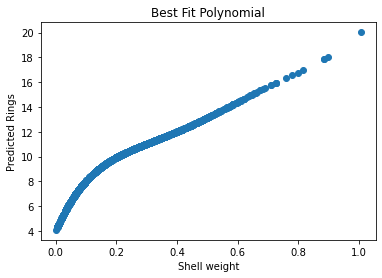

In [23]:
plt.title('Best Fit Polynomial') #plotting scatter plot for best fit polynomial
plt.xlabel('Shell weight')
plt.ylabel("Predicted Rings")
plt.scatter(X_train['Shell weight'],poly_pred(X_train)[1])
plt.show()

Plotting the scatter plot of the actual number of Rings (x-axis) vs the predicted number of 
Rings (y-axis) on the test data for the best degree of the polynomial (p) :-

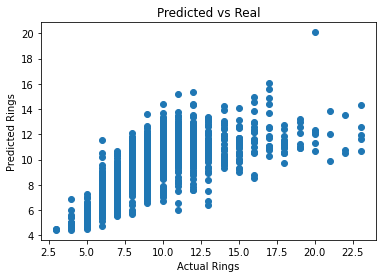

In [24]:
plt.title('Predicted vs Real')
plt.xlabel('Actual Rings')
plt.ylabel("Predicted Rings")
plt.scatter(X_test['Rings'],poly_pred(X_test)[1])
plt.show()

# Multivariate Nonlinear Regression Model

Multivariate nonlinear regression model using polynomial regression to predict Rings :-

In [26]:
def multi_poly_pred(data):#Function for prediction of data
    l = []
    for i in [2,3,4,5]:
        polynomial_features = PolynomialFeatures(degree = i)
        input_var = np.array(data.iloc[:,:-1])
        x_poly = polynomial_features.fit_transform(input_var)
        Rings = np.array(data['Rings'])
        regressor = LinearRegression()
        regressor.fit(x_poly, Rings)
        y_pred = regressor.predict(x_poly)
        error = sqrt(mean_squared_error(data['Rings'], y_pred))
        l.append(error)
    ls = [round(x,3) for x in l]
    return [ls,y_pred]

The prediction accuracy on the training and test data for the different values of degree of 
the polynomial (p = 2, 3, 4, 5) using root mean squared error (RMSE) :-

In [27]:
p = [2,3,4,5]
print("\nRMSE for Training data :-")
for i in range(len(p)):
    print("RMSE Error for p = %d is %.2f"%(p[i],multi_poly_pred(X_train)[0][i]))
print("\nRMSE for Test data :-")
for i in range(len(p)):
    print("RMSE Error for p = %d is %.2f"%(p[i],multi_poly_pred(X_test)[0][i]))


RMSE for Training data :-
RMSE Error for p = 2 is 2.08
RMSE Error for p = 3 is 1.99
RMSE Error for p = 4 is 1.84
RMSE Error for p = 5 is 1.64

RMSE for Test data :-
RMSE Error for p = 2 is 2.05
RMSE Error for p = 3 is 1.93
RMSE Error for p = 4 is 3.29
RMSE Error for p = 5 is 2.02


Plotting the RMSE vs degree of polynomial graph :-
    

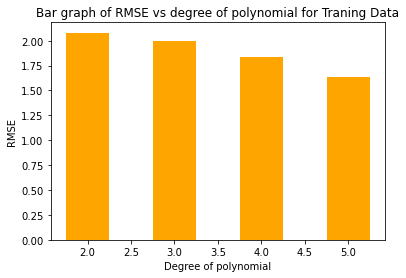

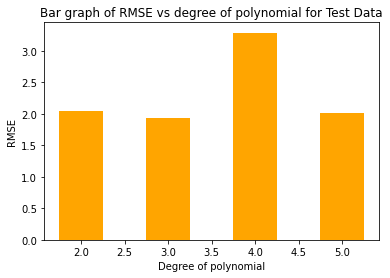

In [28]:
plot2('Traning Data',[2,3,4,5],multi_poly_pred(X_train)[0])
plot2('Test Data',[2,3,4,5],multi_poly_pred(X_test)[0])

Plotting the best fit curve using the best fit model on the training data :-

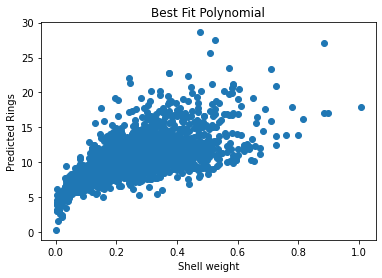

In [29]:
plt.title('Best Fit Polynomial') #plotting scatter plot for best fit polynomial
plt.xlabel('Shell weight')
plt.ylabel("Predicted Rings")
plt.scatter(X_train['Shell weight'],multi_poly_pred(X_train)[1])
plt.show()

Plotting the scatter plot of the actual number of Rings (x-axis) vs the predicted number of Rings (y-axis) on the test data for the best degree of the polynomial (p) :-

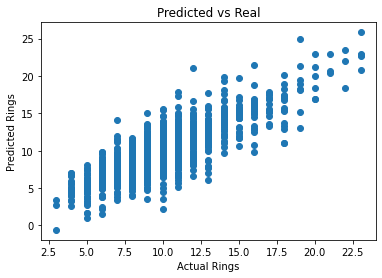

In [30]:
plt.title('Predicted vs Real')
plt.xlabel('Actual Rings')
plt.ylabel("Predicted Rings")
plt.scatter(X_test['Rings'],multi_poly_pred(X_test)[1])
plt.show()

After applying Four different regression model, we found Multivariate Nonlinear Regression Model for p = 5 to be better than others as it has the least RMSE values than the other models for both training as well test data in predicting no. of rings in Abalone.